# **A General Form of ODEs and the Simple Pendulum**
In this week’s session, we dive into the general formulation of ordinary differential equations (ODEs) and their applications in classical mechanics. We focus on one of the most iconic nonlinear systems in physics: the simple pendulum.

General Form of an Ordinary Differential Equation (ODE)

An $n$-th order ordinary differential equation has the general form:

$$
F\left(t, y, \frac{dy}{dt}, \frac{d^2y}{dt^2}, \dots, \frac{d^n y}{dt^n} \right) = 0
$$

If the equation can be solved for the highest derivative $\frac{d^n y}{dt^n}$, then it is said to be in explicit form:

$$
\frac{d^n y}{dt^n} = f\left(t, y, \frac{dy}{dt}, \frac{d^2y}{dt^2}, \dots, \frac{d^{n-1} y}{dt^{n-1}} \right)
$$

A first-order ODE (most common in numerical applications) has the simpler form:

$$
\frac{dy}{dt} = f(t, y)
$$

This form is particularly useful for numerical integration methods like Euler, Runge-Kutta, and Verlet, and it can be extended to systems of equations by treating $y$ as a vector.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## The exponential problem, dx/dt = x:



In [2]:
def rhs_exp(x):
    """
    Function to evaluate the right hand side of the exponential ODE
    dx/dt = x
    
    Parameters:
    x - the current value of the dependent variable
    
    Returns:
    rhs - the value of the RHS
    """
    return x

It numerically solves the ordinary differential equation (ODE)

$$
\frac{dx}{dt} = x
$$

with initial condition:

$$
x(0) = 1
$$

This is a classic exponential growth problem, and its exact solution is:

$$
x(t) = e^t
$$

The code uses Euler’s method to approximate the solution from $t = 0$ to $t = 1$.

Euler’s method approximates the solution using the formula:

$$
x_{n+1} = x_n + \tau \cdot f(x_n)
$$

In this case, since $f(x) = x$, the update becomes:

$$
x_{n+1} = x_n + \tau x_n = x_n (1 + \tau)
$$

The time step $\tau$ is:

In [3]:
# Integrate dx/dt = x using Euler's method

# Number of steps and time step
numSteps = 20
tau = 1/numSteps

# Initial values
t = 0
x = 1

# Show values of independent and dependent variables
print("\n      t       x")
print(f"{t:7.5g} {x:7.5g}")

#-------------------------------------------------------------------------------
# Euler's method integration
for n in range(0, numSteps):

    # One step of Euler:
    # rhs_exp(x) = x.
    f = rhs_exp(x)
    x = x + tau*f
    t = t + tau

    # Show values of independent and dependent variables:
    print(f"{t:7.5g} {x:7.5g}")

#-------------------------------------------------------------------------------
# Display percentage error:
print("Error: %g%%" % (100*abs(x-np.exp(1))/np.exp(1)))



      t       x
      0       1
   0.05    1.05
    0.1  1.1025
   0.15  1.1576
    0.2  1.2155
   0.25  1.2763
    0.3  1.3401
   0.35  1.4071
    0.4  1.4775
   0.45  1.5513
    0.5  1.6289
   0.55  1.7103
    0.6  1.7959
   0.65  1.8856
    0.7  1.9799
   0.75  2.0789
    0.8  2.1829
   0.85   2.292
    0.9  2.4066
   0.95   2.527
      1  2.6533
Error: 2.39063%


 ## **Integrating $\frac{dx}{dt} = x$ using RK4**



The RK4 Model

The Runge-Kutta method is a smart way of updating the value of $x$ from one time step to the next by using multiple estimates of the slope (or derivative) within each interval.

Given a general ODE:

$$
\frac{dx}{dt} = f(x,t)
$$

Think of it like this:

**Instead of taking just one guess for the slope (like Euler does), RK4 takes four smart guesses and combines them in a weighted average. This gives you a much better prediction of how $x$ evolves over time.**


Suppose you’re at time $t_n$ with a known value $x_n$.
1.	First guess (start of the interval):
$$
k_1 = f(x_n, t_n)
$$
2.	Second guess (halfway, using $k_1$):
$$
k_2 = f\left(x_n + \frac{\tau}{2} k_1, t_n + \frac{\tau}{2}\right)
$$
3.	Third guess (again halfway, but using $k_2$):
$$
k_3 = f\left(x_n + \frac{\tau}{2} k_2, t_n + \frac{\tau}{2}\right)
$$
4.	Fourth guess (end of the interval):
$$
k_4 = f\left(x_n + \tau k_3, t_n + \tau\right)
$$

Finally, you update the solution:

$$
x_{n+1} = x_n + \frac{\tau}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$



The RK4 method combines several slope estimates:

•	$k_1$ is the slope at the beginning (underestimates the curvature).

•	$k_2$ and $k_3$ sample in the middle of the interval — these are more reliable.

•	$k_4$ is the slope at the end (may overestimate the curvature).

By weighting the middle slopes ($k_2$ and $k_3$) twice as much, RK4 effectively balances over- and underestimates of the true solution and cancels out lower-order error terms.

# **Implicit evaluation of t**


In the general Runge-Kutta method, the function $f$ may depend explicitly on both the current state $x$ and time $t$. This is written as:

$$
\frac{dx}{dt} = f(x, t)
$$

However, in many physical systems — like undamped or even damped pendulums — the equations are autonomous, meaning they depend only on the state and not explicitly on time:

$$
\frac{dx}{dt} = f(x)
$$

In these cases, $t$ doesn’t influence the right-hand side directly, so we can omit it safely from the implementation. You still advance time $t$ internally during the loop, but it doesn’t affect the dynamics.

You can simplify the equations into:

$$
k_1 = f(x_n)
$$
2.	Second guess (halfway, using $k_1$):
$$
k_2 = f(x_n + \frac{\tau}{2} k_1)
$$
3.	Third guess (again halfway, but using $k_2$):
$$
k_3 = f(x_n + \frac{\tau}{2} k_2)
$$
4.	Fourth guess (end of the interval):
$$
k_4 = f(x_n + \tau k_3)
$$



In [4]:
# Integrate dx/dt = x using RK4

# Number of steps and time step
numSteps = 10
tau = 1/numSteps

# Initial values
t = 0
x = 1

# Show values of independent and dependent variables:
print("\n      t       x")
print("%7.5g %7.5g" % (t, x))

#-------------------------------------------------------------------------------
# RK4 method integration

for n in range(numSteps):
    
    # One step of RK4:

    f1 = rhs_exp(x)
    f2 = rhs_exp(x + 0.5*tau*f1)
    f3 = rhs_exp(x + 0.5*tau*f2)
    f4 = rhs_exp(x + tau*f3)

    x = x + tau*(f1 + 2*f2 + 2*f3 + f4)/6
    t = t + tau

    # Show values of independent and dependent variables
    print("%7.5g %7.5g" % (t, x))

#-------------------------------------------------------------------------------
# Display percentage error:
print("Error: %g%%" % (100*abs(x-np.exp(1))/np.exp(1)))


      t       x
      0       1
    0.1  1.1052
    0.2  1.2214
    0.3  1.3499
    0.4  1.4918
    0.5  1.6487
    0.6  1.8221
    0.7  2.0138
    0.8  2.2255
    0.9  2.4596
      1  2.7183
Error: 7.6678e-05%


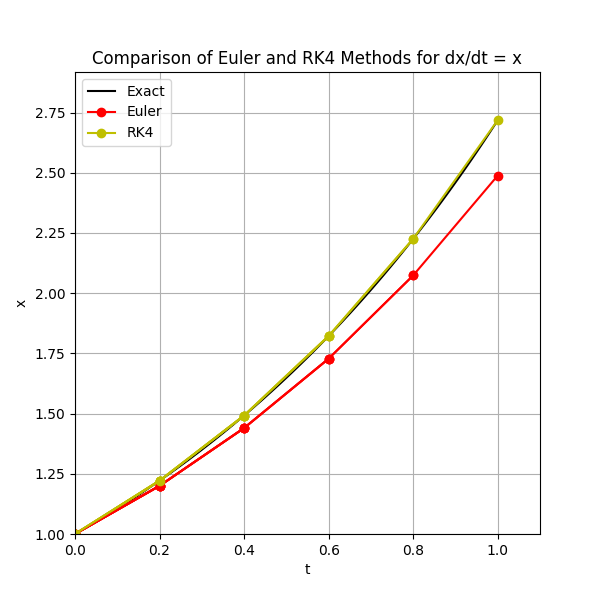

In [5]:
# Number of steps and time step
numSteps = 5
tau = 1/numSteps

# Initial values
t = np.zeros(numSteps+1)
x = np.zeros((numSteps+1, 2))
x[0,:] = 1

#-------------------------------------------------------------------------------
# Integration loop
for n in range(numSteps):
    
    # One step of Euler:
    f = rhs_exp(x[n,0])
    x[n+1,0] = x[n,0] + tau*f
    
    # One step of RK4:
    f1 = rhs_exp(x[n,1])
    f2 = rhs_exp(x[n,1] + 0.5*tau*f1)
    f3 = rhs_exp(x[n,1] + 0.5*tau*f2)
    f4 = rhs_exp(x[n,1] + tau*f3)
    x[n+1,1] = x[n,1] + tau*(f1 + 2*f2 + 2*f3 + f4)/6
    
    # Increment time:
    t[n+1] = t[n] + tau
    
#-------------------------------------------------------------------------------
# Plot the results as an animation
%matplotlib ipympl
%matplotlib widget 
# This enables interactive mode; uncomment and run the following line to go back to static:
# %matplotlib inline
    
# Set up figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('t')
ax.set_ylabel('x')

# Plot the exact solution
tRange = np.linspace(0, 1, 100)
ax.plot(tRange, np.exp(tRange), '-k', label='Exact')

# Plot the numerical solutions interactively
artists = []

for i in range(numSteps):
    
    label1 = 'Euler' if i == numSteps - 1 else None
    label2 = 'RK4' if i == numSteps - 1 else None
            
    plot1, = ax.plot(t[0:i+2], x[0:i+2,0], 'o-r', label=label1)
    plot2, = ax.plot(t[0:i+2], x[0:i+2,1], 'o-y', label=label2)
        
    artists.append([plot1, plot2])
    
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=300, repeat=False)

ax.set_xlim([0, 1.1])
ax.set_ylim([1, np.exp(1)+0.2])
ax.set_title('Comparison of Euler and RK4 Methods for dx/dt = x')
ax.legend()
ax.grid(True)
plt.show()

## **Simple Pendulum Equations**
The equation of motion of a simple pendulum of length $L$ and mass $m$ under the influence of gravity $g$ is:

$$
\frac{d^2\theta}{dt^2} + \frac{g}{L} \sin\theta = 0
$$

where $\theta(t)$ is the angular displacement from the vertical.

This is a second-order nonlinear ODE. It cannot be solved analytically in closed form for arbitrary angles. However, in the small-angle limit ($\theta \ll 1$), we can use the approximation $\sin\theta \approx \theta$, yielding:

$$
\frac{d^2\theta}{dt^2} + \frac{g}{L} \theta = 0
$$

This is the standard form of a simple harmonic oscillator, whose solution is:

$$
\theta(t) = \theta_0 \cos\left(\sqrt{\frac{g}{L}} t\right)
$$

with $\theta_0$ being the initial angle.

## **Numerical Solution**


This function evaluates the right-hand side (RHS) of a system of coupled first-order ODEs that describe the nonlinear motion of a simple pendulum (no damping, no driving).

Physics Background

The equation of motion for a simple pendulum of length $L$ and mass $m$ under gravity $g$ is:

$$
\frac{d^2 \theta}{dt^2} + \frac{g}{L} \sin \theta = 0
$$

This is a second-order nonlinear ODE due to the $\sin\theta$ term.

Rewriting as a System of First-Order ODEs

We define:

•	$\theta$ = angular displacement

•	$\omega = \frac{d\theta}{dt}$ = angular velocity

So the system becomes:

$$
\begin{aligned}
\frac{d\theta}{dt} &= \omega \
\frac{d\omega}{dt} &= -\frac{g}{L} \sin \theta
\end{aligned}
$$

If we non-dimensionalise time using $t’ = t \sqrt{g/L}$, the coefficient simplifies to a constant:

$$
\frac{d\omega}{dt} = -4\pi^2 \sin \theta
$$

In [6]:
def rhs_pend(x):
    """
    rhs_pend: Evaluate the right hand side of the coupled (non-
        dimensional) ODEs describing the nonlinear pendulum
    
    ---INPUT:
    x - the current value of the dependent variable. For the pendulum
        ODEs x = [theta omega] where theta is the angle and omega is the
        angular velocity.
        
    ---OUTPUT:
    rhs - a row vector representing the value of the right hand side
        of the ODEs. Specifically, rhs=[omega -4*pi^2*sin(theta)].
    -------------------------------------------------------------------------------
    """
    
    rhs = np.zeros(2)
    
    theta = x[0];
    omega = x[1];
    rhs[0] = omega;
    rhs[1] = -4*np.pi**2*np.sin(theta)
    
    return rhs

### **Variables*
•	$ \tau $ is the time step for integration.

•	$ T $ is the total simulation time.

•	$ \text{numSteps} = T / \tau $ determines the number of integration steps.

### **Initial Conditions**
•	Initial angular displacement: $50^\circ$

•	Angular velocity is initially zero: $\omega(0) = 0$

•	The state vector is $x = [\theta, \omega]$


In [54]:
#-------------------------------------------------------------------------------
# Time grid parameters:
tau = 0.2 # Time step
T = 7  # Total integration time
numSteps = int(np.ceil(T/tau))  # Number of time steps

#-------------------------------------------------------------------------------
# Initial conditions
theta1 = 170  # Initial angle in degrees
theta = theta1*np.pi/180
x = np.array([theta, 0])

#-------------------------------------------------------------------------------
# Preallocate:
time = np.arange(numSteps+1)*tau

# Arrays to store pendulum positions
xPendArray = np.zeros((numSteps+1, 2))
yPendArray = np.zeros((numSteps+1, 2))

# Initial position
xPendArray[0] = [0, np.sin(x[0])]
yPendArray[0] = [0, -np.cos(x[0])]




RK4 is used to numerically integrate the coupled ODEs:

•	$\frac{d\theta}{dt} = \omega$

•	$\frac{d\omega}{dt} = -4\pi^2 \sin(\theta)$

Each RK4 step evaluates the RHS at four different points and takes a weighted average.



And you want to update this using RK4 with time step $\tau$.

The steps are:
1.	First estimate (at beginning of the interval):
$
\mathbf{f}_1 = f(\mathbf{x}_n) =
$

\begin{bmatrix}
\omega_n \\
-4\pi^2 \sin(\theta_n)
\end{bmatrix}

2.	Second estimate (halfway using $\mathbf{f}_1$):

$
\mathbf{f}_2 = f\left(\mathbf{x}_n + \frac{\tau}{2} \mathbf{f}_1\right)
$

3.	Third estimate (again halfway using $\mathbf{f}_2$):

$
\mathbf{f}_3 = f\left(\mathbf{x}_n + \frac{\tau}{2} \mathbf{f}_2\right)
$

4.	Fourth estimate (end of the interval):

$
\mathbf{f}_4 = f\left(\mathbf{x}_n + \tau \mathbf{f}_3\right)
$

5.	Update the state:

$
\mathbf{x}_{n+1} = \mathbf{x}_n + \frac{\tau}{6} \left( \mathbf{f}_1 + 2\mathbf{f}_2 + 2\mathbf{f}_3 + \mathbf{f}_4 \right)
$

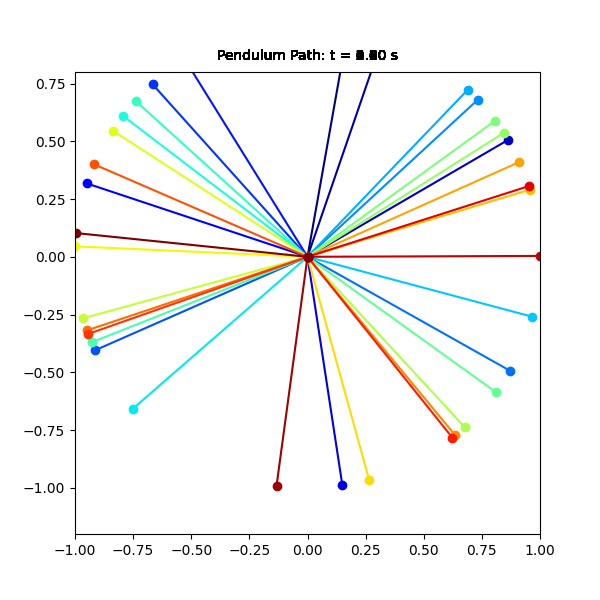

In [55]:

thetas = [x[0],]
#-------------------------------------------------------------------------------
# Fourth-order Runge-Kutta integration
for n in range(numSteps):
    
    # One step of RK4
    f1 = rhs_pend(x)
    f2 = rhs_pend(x + 0.5*tau*f1)
    f3 = rhs_pend(x + 0.5*tau*f2)
    f4 = rhs_pend(x + tau*f3)
    x = x + tau*(f1 + 2*f2 + 2*f3 + f4)/6
    thetas.append(x[0])
    
    # Update the pendulum position:
    # Co-ordinates of the pendulum bar
    xPendArray[n+1] = [0, np.sin(x[0])]
    yPendArray[n+1] = [0, -np.cos(x[0])]


#-------------------------------------------------------------------------------
# Plot the results as an animation

#%matplotlib widget 
# This enables interactive mode; uncomment and run the following line to go back to static:
# %matplotlib inline

# Set up figure
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim([-1, 1])
ax.set_ylim([-1.2, 0.8])

# Plot pendulum paths with rainbow colors
artists = []
colors = plt.cm.jet(np.linspace(0, 1, numSteps))

for i in range(numSteps):
            
    plot,  = ax.plot(xPendArray[i], yPendArray[i], 'o-', color=colors[i]) # Plot pendulum positions
    
    title = ax.text(0, 0.85, f'Pendulum Path: t = {time[i]:.2f} s', ha='center')
    
    artists.append([plot, title])
    
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=80, repeat=False)
plt.show()
# Change interval value to speed up or slow down animation

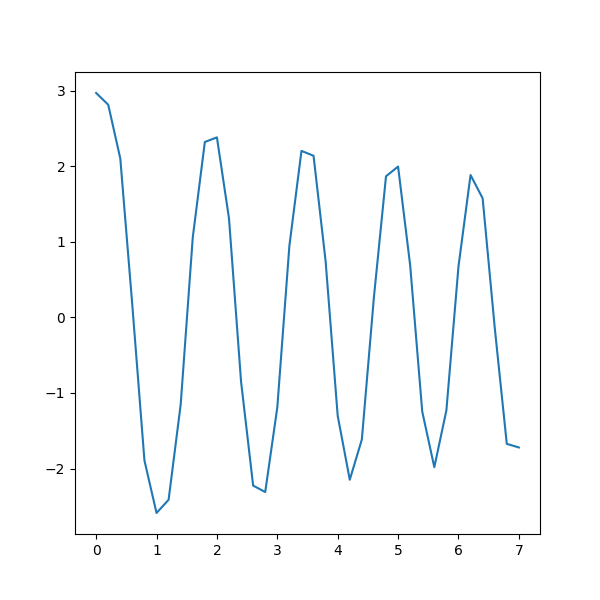

In [56]:
plt.clf()
plt.plot(time, thetas)
plt.show()

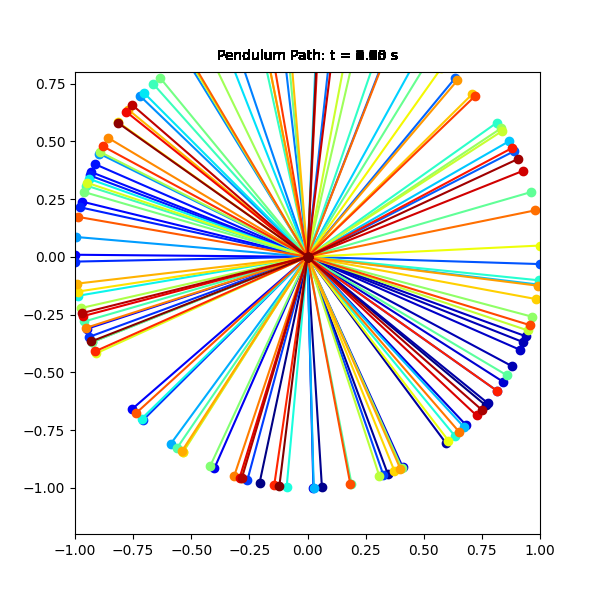

In [10]:


#-------------------------------------------------------------------------------
# Fourth-order Runge-Kutta integration
for n in range(numSteps):
    
    # One step of Euler
    f1 = rhs_pend(x)
    x = x + tau*(f1)

    # Update the pendulum position:
    # Co-ordinates of the pendulum bar
    xPendArray[n+1] = [0, np.sin(x[0])]
    yPendArray[n+1] = [0, -np.cos(x[0])]


#-------------------------------------------------------------------------------
# Plot the results as an animation

#%matplotlib widget 
# This enables interactive mode; uncomment and run the following line to go back to static:
# %matplotlib inline

# Set up figure
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim([-1, 1])
ax.set_ylim([-1.2, 0.8])

# Plot pendulum paths with rainbow colors
artists = []
colors = plt.cm.jet(np.linspace(0, 1, numSteps))

for i in range(numSteps):
            
    plot,  = ax.plot(xPendArray[i], yPendArray[i], 'o-', color=colors[i]) # Plot pendulum positions
    
    title = ax.text(0, 0.85, f'Pendulum Path: t = {time[i]:.2f} s', ha='center')
    
    artists.append([plot, title])
    
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=80, repeat=False)
plt.show()
# Change interval value to speed up or slow down animation

## **Comparing Angle and Energy**

## Equations Used in the Pendulum Simulation

The motion of a simple pendulum (without damping or external forcing) is governed by the system of nonlinear ordinary differential equations (ODEs):

$$
\frac{d\theta}{dt} = \omega
$$

$$
\frac{d\omega}{dt} = -4\pi^2 \sin(\theta)
$$

Where:
- $\theta$ is the angle (in radians) the pendulum makes from the vertical.
- $\omega$ is the angular velocity.

---

### Total Mechanical Energy

The total mechanical energy $E$ of the pendulum is given by the sum of kinetic and potential energy:

$$
E(t) = K(t) + U(t)
$$

- Kinetic energy:
  $$
  K(t) = \frac{1}{2} \omega^2
  $$

- Potential energy (relative to the lowest point of swing):
  $$
  U(t) = 4\pi^2 (1 - \cos\theta)
  $$

Thus, the total energy becomes:

$$
E(t) = \frac{1}{2} \omega^2 + 4\pi^2 (1 - \cos\theta)
$$

---

### Purpose of the Comparison

- **Angle $\theta(t)$**: Shows how the pendulum oscillates over time using both Euler and Runge-Kutta 4th order (RK4) methods.
- **Energy $E(t)$**: Used to assess the conservation of energy, a key indicator of the accuracy and stability of the numerical integration method.

- RK4 maintains energy conservation much better over time, while the Euler method introduces drift due to its lower-order accuracy.

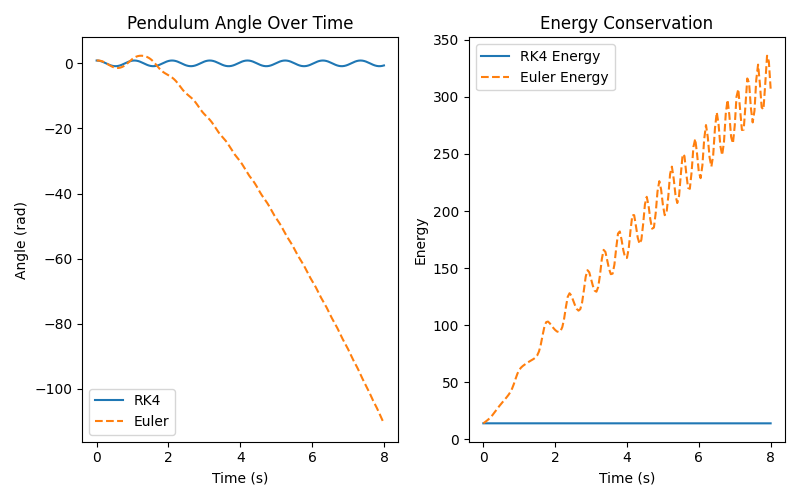

In [57]:

# Define parameters
tau = 0.05  # Time step
T = 8       # Total integration time
numSteps = int(np.ceil(T / tau))
time = np.arange(numSteps + 1) * tau

# Initial conditions
theta0_deg = 50
theta0 = np.radians(theta0_deg)
x0 = np.array([theta0, 0.0])  # [theta, omega]

# Define RHS of the pendulum ODEs
def rhs_pend(x):
    theta, omega = x
    dtheta_dt = omega
    domega_dt = -4 * np.pi**2 * np.sin(theta)
    return np.array([dtheta_dt, domega_dt])

# Function to compute energy
def pendulum_energy(x):
    theta, omega = x
    kinetic = 0.5 * omega**2
    potential = 4 * np.pi**2 * (1 - np.cos(theta))
    return kinetic + potential

# Runge-Kutta 4th Order
x_rk = x0.copy()
rk_data = [x_rk.copy()]
rk_energy = [pendulum_energy(x_rk)]

for _ in range(numSteps):
    f1 = rhs_pend(x_rk)
    f2 = rhs_pend(x_rk + 0.5 * tau * f1)
    f3 = rhs_pend(x_rk + 0.5 * tau * f2)
    f4 = rhs_pend(x_rk + tau * f3)
    x_rk = x_rk + (tau / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
    rk_data.append(x_rk.copy())
    rk_energy.append(pendulum_energy(x_rk))

# Euler Method
x_euler = x0.copy()
euler_data = [x_euler.copy()]
euler_energy = [pendulum_energy(x_euler)]

for _ in range(numSteps):
    f = rhs_pend(x_euler)
    x_euler = x_euler + tau * f
    euler_data.append(x_euler.copy())
    euler_energy.append(pendulum_energy(x_euler))

# Convert to numpy arrays
rk_data = np.array(rk_data)
euler_data = np.array(euler_data)
rk_energy = np.array(rk_energy)
euler_energy = np.array(euler_energy)

# Plot theta over time
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(time, rk_data[:, 0], label="RK4")
plt.plot(time, euler_data[:, 0], label="Euler", linestyle='dashed')
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.title("Pendulum Angle Over Time")
plt.legend()

# Plot energy over time
plt.subplot(1, 2, 2)
plt.plot(time, rk_energy, label="RK4 Energy")
plt.plot(time, euler_energy, label="Euler Energy", linestyle='dashed')
plt.xlabel("Time (s)")
plt.ylabel("Energy")
plt.title("Energy Conservation")
plt.legend()
plt.tight_layout()
plt.show()